In [ ]:
import tensorflow as tf
import os
import random
import numpy as np
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!unzip "/content/drive/MyDrive/Dataset-20240924T053209Z-001.zip"

In [ ]:
xseed = 42
np.random.seed(seed)

DATASET_PATH = '/content/Dataset'
IMAGES_PATH = os.path.join(DATASET_PATH, 'images/train')
MASKS_PATH = os.path.join(DATASET_PATH, 'masks/train')

image_ids = [f for f in os.listdir(IMAGES_PATH) if f.endswith('.png')]

print(image_ids)

['img51.png', 'img15.png', 'img113.png', 'img13.png', 'img106.png', 'img70.png', 'img111.png', 'img107.png', 'img69.png', 'img110.png', 'img104.png', 'img103.png', 'img101.png', 'img109.png', 'img60.png', 'img67.png', 'img14.png', 'img68.png', 'img16.png', 'img105.png', 'img53.png', 'img63.png', 'img18.png', 'img17.png', 'img112.png', 'img102.png', 'img21.png', 'img114.png', 'img108.png', 'img115.png']


In [ ]:
x_data = np.array([imread(os.path.join(IMAGES_PATH, image_ids[0]))])
x_data

array([[[146,  42, 238, ...,  50,  67, 124],
        [163,  44, 240, ..., 118,  51, 104],
        [ 96, 212, 127, ...,  62,  66,  77],
        ...,
        [ 75,  29, 194, ...,  57, 158, 101],
        [ 65,  76,  43, ...,  72, 184,  75],
        [107,  64,  49, ...,  87,  52, 129]]], dtype=uint8)

In [ ]:
x_data = np.array([imread(os.path.join(IMAGES_PATH, img_id)) for img_id in image_ids])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (30,) + inhomogeneous part.

In [ ]:
IMG_HEIGHT = 40000
IMG_WIDTH = 20000
IMG_CHANNELS = 3

# Prepare the data arrays with fixed dimensions
X_data = np.zeros((len(image_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_data = np.zeros((len(image_ids), IMG_HEIGHT, IMG_WIDTH, 1))
print("X_data:",X_data)
print("Y_data:",Y_data)

X_data: [[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]


In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
from glob import glob
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
# from unet import build_unet
# from metrics import dice_loss, dice_coef

""" Global parameters """
H = 256
W = 256

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def load_dataset(path, split=0.2):
    images = sorted(glob(os.path.join(path, "images",'train', "*.png")))
    masks = sorted(glob(os.path.join(path, "masks",'train', "*.png")))

    split_size = int(len(images) * split)
w
    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=42)

    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=42)

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

def read_image(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (W, H))
    x = x / 255.0
    x = x.astype(np.float32)
    return x

def read_mask(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  ## (h, w)
    x = cv2.resize(x, (W, H))   ## (h, w)
    x = x / 255.0               ## (h, w)
    x = x.astype(np.float32)    ## (h, w)
    x = np.expand_dims(x, axis=-1)## (h, w, 1)
    return x

def tf_parse(x, y):
    def _parse(x, y):
        x = read_image(x)
        y = read_mask(y)
        tiled_images_and_masks = image_tile(x, y, 1200)

        tiled_images = np.array([img for img, _ in tiled_images_and_masks])
        tiled_masks = np.array([mask for _, mask in tiled_images_and_masks])

        return tiled_images, tiled_masks

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape([None, H, W, 3])
    y.set_shape([None, H, W, 1])
    return x, y


def tf_dataset(X, Y, batch=2):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.flat_map(lambda x, y: tf.data.Dataset.from_tensor_slices(tf_parse(x, y)))
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(10)
    return dataset

def image_tile(image, mask, tile_size):
    image_h, image_w, _ = image.shape
    mask_h, mask_w, _ = mask.shape

    assert image_h == mask_h and image_w == mask_w, "Image and mask dimensions must be equal."

    # Calculate number of tiles
    num_tiles_h = int(np.ceil(image_h / tile_size))
    num_tiles_w = int(np.ceil(image_w / tile_size))

    # List to store tiled images and masks
    tiled_images_and_masks = []

    for y in range(num_tiles_h):
        for x in range(num_tiles_w):
            y_start = y * tile_size
            y_end = min(y_start + tile_size, image_h)
            x_start = x * tile_size
            x_end = min(x_start + tile_size, image_w)

            tiled_image = image[y_start:y_end, x_start:x_end]
            tiled_mask = mask[y_start:y_end, x_start:x_end]

            # Resize tiles to the desired shape (H, W)
            tiled_image = cv2.resize(tiled_image, (W, H))
            tiled_mask = cv2.resize(tiled_mask, (W, H))

            tiled_images_and_masks.append((tiled_image, tiled_mask))

    return tiled_images_and_masks


if __name__ == "__main__":
    np.random.seed(42)
    tf.random.set_seed(42)

    create_dir("files")

    batch_size = 16
    lr = 1e-4
    num_epochs = 500
    model_path = os.path.join("files", "model.h5")
    csv_path = os.path.join("files", "log.csv")
    dataset_path = "Dataset"
    (train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_dataset(dataset_path)

    print(f"Train: {len(train_x)} - {len(train_y)}")
    print(f"Valid: {len(valid_x)} - {len(valid_y)}")
    print(f"Test : {len(test_x)} - {len(test_y)}")

    train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
    valid_dataset = tf_dataset(valid_x, valid_y, batch=batch_size)

    model = build_unet((H, W, 3))
    model.compile(tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=Adam(lr), metrics=['acc'])

    callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        CSVLogger(csv_path),
        ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=10, min_lr=1e-6),
        EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True),
        TensorBoard()
    ]

    model.fit(
        train_dataset,
        epochs=num_epochs,
        validation_data=valid_dataset,
        callbacks=callbacks
    )


Train: 18 - 18
Valid: 6 - 6
Test : 6 - 6


NameError: name 'build_unet' is not defined

In [ ]:
def read_mask(path):
  # path = path.decode()
  x = tf.io.read_file(path)
  x = tf.image.decode_png(x, channels=1)
  x = tf.image.resize(x,(1200,1200))
  x = tf.cast(x, tf.float32) / 255.0
  return x

In [ ]:
X = np.array([read_image(x) for x in X]) # List comprehension for efficiency
y = np.array([read_mask(y) for y in y])

In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
from glob import glob
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
# from unet import build_unet
# from metrics import dice_loss, dice_coef

""" Global parameters """
H = 256
W = 256

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def load_dataset(path, split=0.2):
    images = sorted(glob(os.path.join(path, "images", 'train', "*.png")))
    masks = sorted(glob(os.path.join(path, "masks", 'train', "*.png")))

    split_size = int(len(images) * split)

    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=42)

    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=42)

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

def read_image(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (W, H))
    x = x / 255.0
    x = x.astype(np.float32)
    return x

def read_mask(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  ## (h, w)
    x = cv2.resize(x, (W, H))   ## (h, w)
    x = x / 255.0               ## (h, w)
    x = x.astype(np.float32)    ## (h, w)
    # x = np.expand_dims(x, axis=-1) ## (h, w, 1)
    return x

def tf_parse(x, y):
    def _parse(x, y):
        x = read_image(x)
        y = read_mask(y)
        tiled_images_and_masks = image_tile(x, y, 1200)

        tiled_images = np.array([img for img, _ in tiled_images_and_masks])
        tiled_masks = np.array([mask for _, mask in tiled_images_and_masks])

        return tiled_images, tiled_masks

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape([None, H, W, 3])
    y.set_shape([None, H, W])
    return x, y


def tf_dataset(X, Y, batch=2):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.flat_map(lambda x, y: tf.data.Dataset.from_tensor_slices(tf_parse(x, y)))
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(10)
    return dataset

def image_tile(image, mask, tile_size):
    image_h, image_w, _ = image.shape
    mask_h, mask_w = mask.shape[:2]  # Only use the first two dimensions of the mask

    assert image_h == mask_h and image_w == mask_w, "Image and mask dimensions must be equal."

    # Calculate number of tiles
    num_tiles_h = int(np.ceil(image_h / tile_size))
    num_tiles_w = int(np.ceil(image_w / tile_size))

    # List to store tiled images and masks
    tiled_images_and_masks = []

    for y in range(num_tiles_h):
        for x in range(num_tiles_w):
            y_start = y * tile_size
            y_end = min(y_start + tile_size, image_h)
            x_start = x * tile_size
            x_end = min(x_start + tile_size, image_w)

            tiled_image = image[y_start:y_end, x_start:x_end]
            tiled_mask = mask[y_start:y_end, x_start:x_end]

            # Resize tiles to the desired shape (H, W)
            tiled_image = cv2.resize(tiled_image, (W, H))
            tiled_mask = cv2.resize(tiled_mask, (W, H))

            tiled_images_and_masks.append((tiled_image, tiled_mask))

    return tiled_images_and_masks


if __name__ == "__main__":
    np.random.seed(42)
    tf.random.set_seed(42)

    create_dir("files")

    batch_size = 16
    lr = 1e-4
    num_epochs = 500
    model_path = os.path.join("files", "model.h5")
    csv_path = os.path.join("files", "log.csv")
    dataset_path = "Dataset"
    (train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_dataset(dataset_path)

    print(f"Train: {len(train_x)} - {len(train_y)}")
    print(f"Valid: {len(valid_x)} - {len(valid_y)}")
    print(f"Test : {len(test_x)} - {len(test_y)}")

    train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
    valid_dataset = tf_dataset(valid_x, valid_y, batch=batch_size)

    model = build_unet((H, W, 3))
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer=Adam(lr), metrics=['acc'])

    callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        CSVLogger(csv_path),
        ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=10, min_lr=1e-6),
        EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True),
        TensorBoard()
    ]

    model.fit(
        train_dataset,
        epochs=num_epochs,
        validation_data=valid_dataset,
        callbacks=callbacks
    )


2/2 [==============================] - ETA: 0s - loss: 0.2635 - acc: 0.9616 
Epoch 28: val_loss improved from 0.56303 to 0.55584, saving model to files/model.h5
2/2 [==============================] - 16s 4s/step - loss: 0.2635 - acc: 0.9616 - val_loss: 0.5558 - val_acc: 0.9319 - lr: 1.0000e-04
Epoch 29/500
2/2 [==============================] - ETA: 0s - loss: 0.2564 - acc: 0.9632 
Epoch 29: val_loss improved from 0.55584 to 0.54859, saving model to files/model.h5
2/2 [==============================] - 16s 4s/step - loss: 0.2564 - acc: 0.9632 - val_loss: 0.5486 - val_acc: 0.9319 - lr: 1.0000e-04
Epoch 30/500
2/2 [==============================] - ETA: 0s - loss: 0.2501 - acc: 0.9641 
Epoch 30: val_loss improved from 0.54859 to 0.54107, saving model to files/model.h5
2/2 [==============================] - 16s 4s/step - loss: 0.2501 - acc: 0.9641 - val_loss: 0.5411 - val_acc: 0.9319 - lr: 1.0000e-04
Epoch 31/500
2/2 [==============================] - ETA: 0s - loss: 0.2435 - acc: 0.9656 

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, 2, strides=2, padding="same")(inputs)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    # print(s1.shape, s2.shape, s3.shape, s4.shape)
    # print(p1.shape, p2.shape, p3.shape, p4.shape)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="UNET")
    return model

if __name__ == "__main__":
    input_shape = (256, 256, 3)
    model = build_unet(input_shape)
    model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 256, 256, 64)         0         ['batch_normalization[0][0]

In [ ]:
# Model checkpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_craters.h5', verbose=1, save_best_only=True)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs'),
    tf.keras.callbacks.CSVLogger("log_file.log")
]

results = model.fit(X, y, validation_split=0.1, batch_size=16, epochs=5, callbacks=callbacks)
model.save('model.h5')
# results = model.fit(X, y, validation_split=0.1, batch_size=16, epochs=25)
# model.save_model('model.h5')

Epoch 1/5
1/1 [==============================] - 83s 83s/step - loss: 0.3392 - accuracy: 0.9111 - val_loss: 0.3040 - val_accuracy: 0.9880
Epoch 2/5
1/1 [==============================] - 83s 83s/step - loss: 0.3395 - accuracy: 0.9111 - val_loss: 0.2944 - val_accuracy: 0.9880
Epoch 3/5
1/1 [==============================] - 82s 82s/step - loss: 0.3366 - accuracy: 0.9111 - val_loss: 0.2783 - val_accuracy: 0.9880
Epoch 4/5
1/1 [==============================] - 83s 83s/step - loss: 0.3311 - accuracy: 0.9111 - val_loss: 0.2573 - val_accuracy: 0.9880
Epoch 5/5
1/1 [==============================] - 83s 83s/step - loss: 0.3251 - accuracy: 0.9111 - val_loss: 0.2345 - val_accuracy: 0.9880


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
from glob import glob
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

""" Global parameters """
H = 256
W = 256

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def load_dataset(path, split=0.2):
    images = sorted(glob(os.path.join(path, "images", 'train', "*.png")))
    masks = sorted(glob(os.path.join(path, "masks", 'train', "*.png")))

    split_size = int(len(images) * split)

    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=42)

    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=42)

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

def read_image(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (W, H))
    x = x / 255.0
    x = x.astype(np.float32)
    return x

def read_mask(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  ## (h, w)
    x = cv2.resize(x, (W, H))   ## (h, w)
    x = x / 255.0               ## (h, w)
    x = x.astype(np.float32)    ## (h, w)
    x = np.expand_dims(x, axis=-1) ## (h, w, 1)
    return x

def tf_parse(x, y):
    def _parse(x, y):
        x = read_image(x)
        y = read_mask(y)
        tiled_images_and_masks = image_tile(x, y, 1200)

        tiled_images = np.array([img for img, _ in tiled_images_and_masks])
        tiled_masks = np.array([mask for _, mask in tiled_images_and_masks])

        return tiled_images, tiled_masks

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape([None, H, W, 3])
    y.set_shape([None, H, W, 1])
    return x, y


def tf_dataset(X, Y, batch=2):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.flat_map(lambda x, y: tf.data.Dataset.from_tensor_slices(tf_parse(x, y)))
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(10)
    return dataset

def image_tile(image, mask, tile_size):
    image_h, image_w, _ = image.shape
    mask_h, mask_w, _ = mask.shape

    assert image_h == mask_h and image_w == mask_w, "Image and mask dimensions must be equal."

    # Calculate number of tiles
    num_tiles_h = int(np.ceil(image_h / tile_size))
    num_tiles_w = int(np.ceil(image_w / tile_size))

    # List to store tiled images and masks
    tiled_images_and_masks = []

    for y in range(num_tiles_h):
        for x in range(num_tiles_w):
            y_start = y * tile_size
            y_end = min(y_start + tile_size, image_h)
            x_start = x * tile_size
            x_end = min(x_start + tile_size, image_w)

            tiled_image = image[y_start:y_end, x_start:x_end]
            tiled_mask = mask[y_start:y_end, x_start:x_end]

            # Resize tiles to the desired shape (H, W)
            tiled_image = cv2.resize(tiled_image, (W, H))
            tiled_mask = cv2.resize(tiled_mask, (W, H))

            tiled_images_and_masks.append((tiled_image, tiled_mask))

    return tiled_images_and_masks


if __name__ == "__main__":
    np.random.seed(42)
    tf.random.set_seed(42)

    create_dir("files")

    batch_size = 16
    lr = 1e-4
    num_epochs = 500
    model_path = os.path.join("files", "model.h5")
    csv_path = os.path.join("files", "log.csv")
    dataset_path = "Dataset"
    (train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_dataset(dataset_path)

    print(f"Train: {len(train_x)} - {len(train_y)}")
    print(f"Valid: {len(valid_x)} - {len(valid_y)}")
    print(f"Test : {len(test_x)} - {len(test_y)}")

    train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
    valid_dataset = tf_dataset(valid_x, valid_y, batch=batch_size)

    model = build_unet((H, W, 3))
    model.compile(tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=Adam(lr), metrics=['acc'])

    callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        CSVLogger(csv_path),
        ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=10, min_lr=1e-6),
        EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True),
        TensorBoard()
    ]

    model.fit(
        train_dataset,
        epochs=num_epochs,
        validation_data=valid_dataset,
        callbacks=callbacks
    )


In [ ]:
seed = 42
np.random.seed(seed)

DATASET_PATH = '/content/Dataset'
IMAGES_PATH = os.path.join(DATASET_PATH, 'images/test')
MASKS_PATH = os.path.join(DATASET_PATH, 'masks/test')

image_ids = [f for f in os.listdir(IMAGES_PATH) if f.endswith('.png')]

IMG_HEIGHT = 1200
IMG_WIDTH = 1200
IMG_CHANNELS = 3

# Prepare the data arrays with fixed dimensions
X_data = np.zeros((len(image_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_data = np.zeros((len(image_ids), IMG_HEIGHT, IMG_WIDTH, 1))
# print("X_data:",X_data)
# print("Y_data:",Y_data)

In [ ]:
from glob import glob
X = sorted(glob("/content/Dataset/images/test/*"))
print(X[0])
y = sorted(glob("/content/Dataset/masks/test/*"))

/content/Dataset/images/test/img1.png


In [ ]:
X = np.array([read_image(x) for x in X]) # List comprehension for efficiency
y = np.array([read_mask(y) for y in y])

1/1 [==============================] - 3s 3s/step


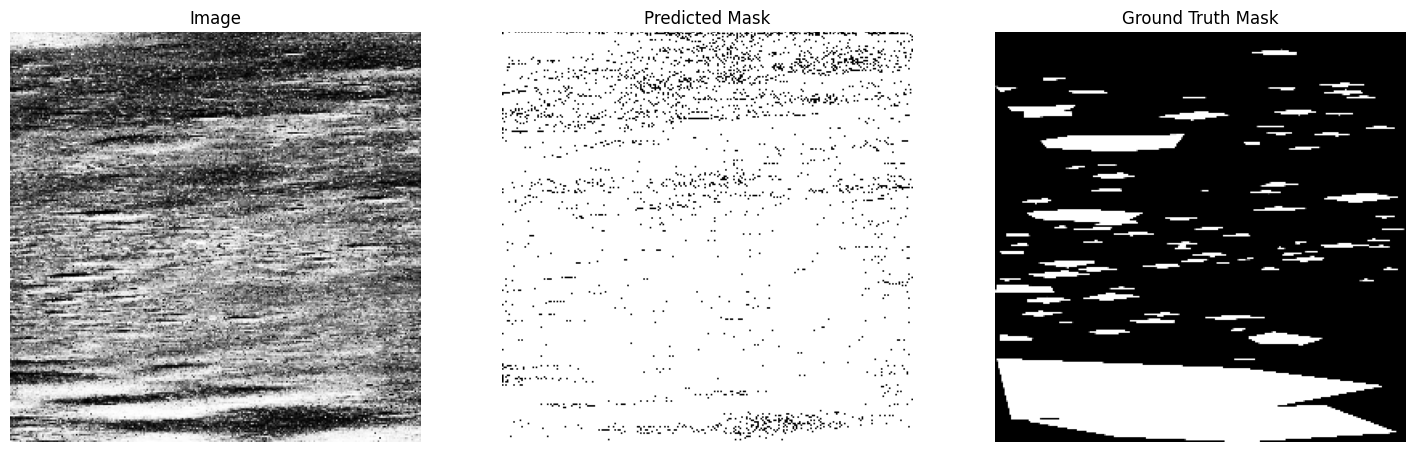

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
def read_image(path):
    # path = path.decode()  # Remove or comment out this line
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (W, H))
    x = x/255.0
    x = x.astype(np.float32)
    return x
def read_mask(path):
    # path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  ## (h, w)
    x = cv2.resize(x, (W, H))   ## (h, w)
    x = x / 255.0               ## (h, w)
    x = x.astype(np.float32)    ## (h, w)
    # x = np.expand_dims(x, axis=-1) ## (h, w, 1)
    return x
# Load and preprocess the images before prediction
X_images = np.array([read_image(x) for x in X])  # Assuming 'read_image' is a function to load and preprocess images

# Predict on the preprocessed image data
preds_train = model.predict(X_images, verbose=1)
preds_train_t = (preds_train > 0.5).astype(np.uint8)

# Perform a sanity check on some random samples
# Display a random image from the training set along with its predicted mask and ground truth mask
plt.figure(figsize=(18, 6))  # Increased figure size to accommodate three subplots

# Display the original image
plt.subplot(1, 3, 1)
plt.title('Image')
plt.imshow(X_images[0])  # X_images[0] contains the image data
plt.axis('off')

# Display the predicted mask
plt.subplot(1, 3, 2)
plt.title('Predicted Mask')
plt.imshow(np.squeeze(preds_train_t[0]), cmap='gray')  # Assuming preds_train_t[0] has shape (height, width, 1)
plt.axis('off')

# Display the ground truth mask
plt.subplot(1, 3, 3)
plt.title('Ground Truth Mask')
# Assuming 'y' contains the ground truth masks and 'read_mask' is a function to load them
mask = read_mask(y[0])  # Load the corresponding mask for the image
plt.imshow(np.squeeze(mask), cmap='gray')  # Display the ground truth mask
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull

# Function to read image
def read_image(path):
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (W, H))
    x = x/255.0
    x = x.astype(np.float32)
    return x

# Function to read mask
def read_mask(path):
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  ## (h, w)
    x = cv2.resize(x, (W, H))   ## (h, w)
    x = x / 255.0               ## (h, w)
    x = x.astype(np.float32)    ## (h, w)
    return x

# Load and preprocess the images before prediction
X_images = np.array([read_image(x) for x in X])  # Assuming 'X' contains paths to images

# Predict on the preprocessed image data
preds_train = model.predict(X_images, verbose=1)
preds_train_t = (preds_train > 0.7).astype(np.uint8)  # Threshold the prediction

# Function to apply DBSCAN clustering on predicted mask
def apply_dbscan(mask, eps=5, min_samples=5):
    points = np.column_stack(np.where(mask == 1))  # Get coordinates of predicted crater areas

    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(points)
    labels = dbscan.labels_

    return points, labels

# Visualize the clustering results
def visualize_clusters(image, mask, points, labels):
    plt.figure(figsize=(18, 6))  # Increased figure size to accommodate three subplots

    # Display the original image
    plt.subplot(1, 3, 1)
    plt.title('Image')
    plt.imshow(image)
    plt.axis('off')

    # Display the predicted mask
    plt.subplot(1, 3, 2)
    plt.title('Predicted Mask')
    plt.imshow(np.squeeze(mask), cmap='gray')
    plt.axis('off')

    # Display clusters and convex hulls
    plt.subplot(1, 3, 3)
    plt.title('DBSCAN Clustering')
    plt.imshow(np.squeeze(mask), cmap='gray')

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)
        cluster_points = points[class_member_mask]
        plt.plot(cluster_points[:, 1], cluster_points[:, 0], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

        # Create a convex hull around each cluster to join the points if there are enough points
        if len(cluster_points) > 2:  # Check if there are enough points for a hull
            try:
                hull = ConvexHull(cluster_points)
                for simplex in hull.simplices:
                    plt.plot(cluster_points[simplex, 1], cluster_points[simplex, 0], 'k-')
            except Exception as e:
                print(f"Convex hull error: {e}")

    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.axis('off')

    plt.show()

# Example on first image and its corresponding predicted mask
image = X_images[0]
pred_mask = preds_train_t[0]  # First predicted mask

# Apply DBSCAN on the predicted mask
points, labels = apply_dbscan(pred_mask)

# Visualize the clusters on the original image and mask
visualize_clusters(image, pred_mask, points, labels)


1/1 [==============================] - 3s 3s/step


ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required by DBSCAN.

In [ ]:
print(preds_train_t)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]

In [ ]:
print('Resizing images and masks')
for n, id_ in tqdm(enumerate(image_ids), total=len(image_ids)):
    img_path = os.path.join(IMAGES_PATH, id_)
    img = imread(img_path)

    # Ensure the image has 3 channels
    if len(img.shape) == 2:  # Grayscale image
        img = np.stack((img,)*3, axis=-1)
    elif img.shape[2] == 4:  # Image with alpha channel
        img = img[:, :, :3]

    img_resized = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_data[n] = img_resized

    mask_path = os.path.join(MASKS_PATH, id_.replace('.png', '_mask.png'))
    mask = imread(mask_path)
    if len(mask.shape) == 2:  # Grayscale mask
        mask = np.expand_dims(mask, axis=-1)
    mask_resized = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    Y_data[n] = mask_resized

print('Done!')

Resizing images and masks


 27%|██▋       | 8/30 [00:20<00:57,  2.61s/it]


KeyboardInterrupt: 

In [ ]:
print('Resizing images and masks')
for n, id_ in tqdm(enumerate(image_ids), total=len(image_ids)):
    img_path = os.path.join(IMAGES_PATH, id_)
    img = imread(img_path)

    # Ensure the image has 3 channels
    if len(img.shape) == 2:  # Grayscale image
        img = np.stack((img,)*3, axis=-1)
    elif img.shape[2] == 4:  # Image with alpha channel
        img = img[:, :, :3]

    img_resized = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img_resized

    mask_path = os.path.join(MASKS_PATH, id_.replace('.png', '_mask.png'))
    mask = imread(mask_path)
    if len(mask.shape) == 2:  # Grayscale mask
        mask = np.expand_dims(mask, axis=-1)
    mask_resized = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    Y_test[n] = mask_resized

print('Done!')

Resizing images and masks


100%|██████████| 11/11 [00:39<00:00,  3.60s/it]

Done!


In [ ]:
results.save('unet_res.h5')

AttributeError: 'History' object has no attribute 'save'

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load the trained U-Net model
model = load_model('unet.h5')

# Load and preprocess the input image
input_image_path = '/content/drive/MyDrive/dataset/images/test/img118.png'
input_image = load_img(input_image_path, target_size=(1200, 1200))  # Resize to model's input size
input_image = img_to_array(input_image) / 255.0  # Normalize pixel values to [0, 1]
input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension

# Get the model's output
output = model.predict(input_image)

# Post-process the output (e.g., apply a threshold to get a binary mask)
threshold = 0.5
binary_mask = (output[0, :, :, 0] > threshold).astype(np.uint8)

# If needed, you can save the binary mask as an image
import cv2
cv2.imwrite('output_binary_mask118.png', binary_mask * 255)  # Multiply by 255 to convert to [0, 255] range

1/1 [==============================] - 2s 2s/step


True

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model

def divide_into_patches(image, patch_size):
    patches = []
    img_height, img_width, _ = image.shape
    for i in range(0, img_height, patch_size[0]):
        for j in range(0, img_width, patch_size[1]):
            patch = image[i:i + patch_size[0], j:j + patch_size[1], :]
            if patch.shape[:2] == patch_size:
                patches.append(patch)
    return np.array(patches)

# Load the image
image = load_img('Dataset/images/train/img101.png')
image = img_to_array(image)

# Define patch size, e.g., 256x256
patch_size = (256, 256)
patches = divide_into_patches(image, patch_size)
# Load the mask (assuming it's already binary/segmented)
mask = load_img('Dataset/masks/train/img101_mask.png', color_mode='grayscale')
mask = img_to_array(mask)

# Divide the mask into patches
mask_patches = divide_into_patches(mask, patch_size)
def unet_model(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Downsample
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Upsample
    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = UpSampling2D((2, 2))(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])

    return model

model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Normalize image and mask patches
patches = patches / 255.0
mask_patches = mask_patches / 255.0

# Train the model
model.fit(patches, mask_patches, epochs=10, batch_size=32)
predicted_patches = model.predict(patches)
def reconstruct_from_patches(patches, image_shape, patch_size):
    reconstructed_image = np.zeros(image_shape)
    patch_idx = 0
    for i in range(0, image_shape[0], patch_size[0]):
        for j in range(0, image_shape[1], patch_size[1]):
            if patch_idx < len(patches):
                reconstructed_image[i:i + patch_size[0], j:j + patch_size[1], :] = patches[patch_idx]
                patch_idx += 1
    return reconstructed_image

reconstructed_image = reconstruct_from_patches(predicted_patches, image.shape, patch_size)
from tensorflow.keras.preprocessing.image import array_to_img

output_image = array_to_img(reconstructed_image)
output_image.save('content/predicted_image.png')


Epoch 1/10


In [ ]:
!pip install opencv-python-headless


In [ ]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split

def load_data(image_dir, mask_dir, patch_size):
    images = []
    masks = []

    # Load images and masks
    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            # Load image
            img_path = os.path.join(image_dir, filename)
            image = cv2.imread(img_path)
            if image is None:
                print(f"Warning: Image {img_path} not found or unable to load.")
                continue
            image = image / 255.0  # Normalize to [0, 1]
            images.append(image)

            # Load mask
            mask_path = os.path.join(mask_dir, filename)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                print(f"Warning: Mask {mask_path} not found or unable to load.")
                continue
            mask = mask / 255.0  # Normalize to [0, 1]
            masks.append(mask)

    if not images or not masks:
        raise ValueError("No valid images or masks were loaded. Check your file paths.")

    images = np.array(images)
    masks = np.array(masks)

    # Extract patches from images and masks
    image_patches = []
    mask_patches = []

    for img, msk in zip(images, masks):
        h, w, _ = img.shape

        for y in range(0, h, patch_size[0]):
            for x in range(0, w, patch_size[1]):
                # Extract patches
                img_patch = img[y:y + patch_size[0], x:x + patch_size[1]]
                msk_patch = msk[y:y + patch_size[0], x:x + patch_size[1]]

                # Check if the patch is of the required size
                if img_patch.shape[0] == patch_size[0] and img_patch.shape[1] == patch_size[1]:
                    image_patches.append(img_patch)
                    mask_patches.append(msk_patch)

    return np.array(image_patches), np.array(mask_patches)

# Specify directories for images and masks
DATASET_PATH = '/content/Dataset'
image_dir = os.path.join(DATASET_PATH, 'images/train')
mask_dir = os.path.join(DATASET_PATH, 'masks/train')

# Define patch size
patch_size = (256, 256, 3)  # Height, Width, Channels

# Load data
X, y = load_data(image_dir, mask_dir, patch_size)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: No valid images or masks were loaded. Check your file paths.

In [ ]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split

def pad_image(img, patch_size):
    """
    Pads the image so that its dimensions are divisible by the patch size.
    """
    h, w = img.shape[:2]
    pad_h = (patch_size[0] - (h % patch_size[0])) % patch_size[0]
    pad_w = (patch_size[1] - (w % patch_size[1])) % patch_size[1]

    # Add padding (pad evenly on all sides)
    img_padded = cv2.copyMakeBorder(img, 0, pad_h, 0, pad_w, cv2.BORDER_CONSTANT, value=0)
    print("done padding")
    return img_padded

def load_data(image_dir, mask_dir, patch_size):
    images = []
    masks = []

    # Load images and masks
    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            # Load image
            img_path = os.path.join(image_dir, filename)
            image = cv2.imread(img_path)

            if image is None:
                print(f"Warning: Image {img_path} not found or unable to load.")
                continue

            image = image / 255.0  # Normalize to [0, 1]

            # Load mask (assumed naming convention: <image_name>_mask.png)
            mask_path = os.path.join(mask_dir, filename.replace('.png', '_mask.png'))
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            if mask is None:
                print(f"Warning: Mask {mask_path} not found or unable to load.")
                continue

            mask = mask / 255.0  # Normalize to [0, 1]

            # Dynamically pad both image and mask
            image_padded = pad_image(image, patch_size)
            mask_padded = pad_image(mask, patch_size)

            images.append(image_padded)
            masks.append(mask_padded)

    if not images or not masks:
        raise ValueError("No valid images or masks were loaded. Check your file paths.")

    images = np.array(images)
    masks = np.array(masks)

    # Extract patches from images and masks
    image_patches = []
    mask_patches = []

    for img, msk in zip(images, masks):
        h, w = img.shape[:2]  # Use [:2] to get height and width

        for y in range(0, h, patch_size[0]):
            for x in range(0, w, patch_size[1]):
                # Extract patches
                img_patch = img[y:y + patch_size[0], x:x + patch_size[1]]
                msk_patch = msk[y:y + patch_size[0], x:x + patch_size[1]]

                # Check if the patch is of the required size
                if img_patch.shape[0] == patch_size[0] and img_patch.shape[1] == patch_size[1]:
                    image_patches.append(img_patch)
                    mask_patches.append(msk_patch)

    return np.array(image_patches), np.array(mask_patches)

# Specify directories for images and masks
DATASET_PATH = '/content/Dataset'
image_dir = os.path.join(DATASET_PATH, 'images/train')
mask_dir = os.path.join(DATASET_PATH, 'masks/train')

# Define patch size - Updated to (256, 256)
patch_size = (256, 256)  # Height, Width

# Load data
X, y = load_data(image_dir, mask_dir, patch_size)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding
done padding


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (30,) + inhomogeneous part.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_shape):
    inputs = layers.Input(input_shape)

    # Downsampling
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, 3, activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, 3, activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(c5)

    # Upsampling
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, 3, activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, 3, activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, 3, activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, 3, activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, 3, activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, 3, activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, 3, activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, 3, activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c9)  # Output layer

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Create the U-Net model
input_shape = (256, 256, 3)  # Input shape of images
model = unet_model(input_shape)
